In [2]:
# 데이터 셋 나누기(훈련셋, 테스트셋)
from sklearn.model_selection import train_test_split
# 선형회귀
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
data = pd.read_csv("hosthome/weather.csv")
data.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


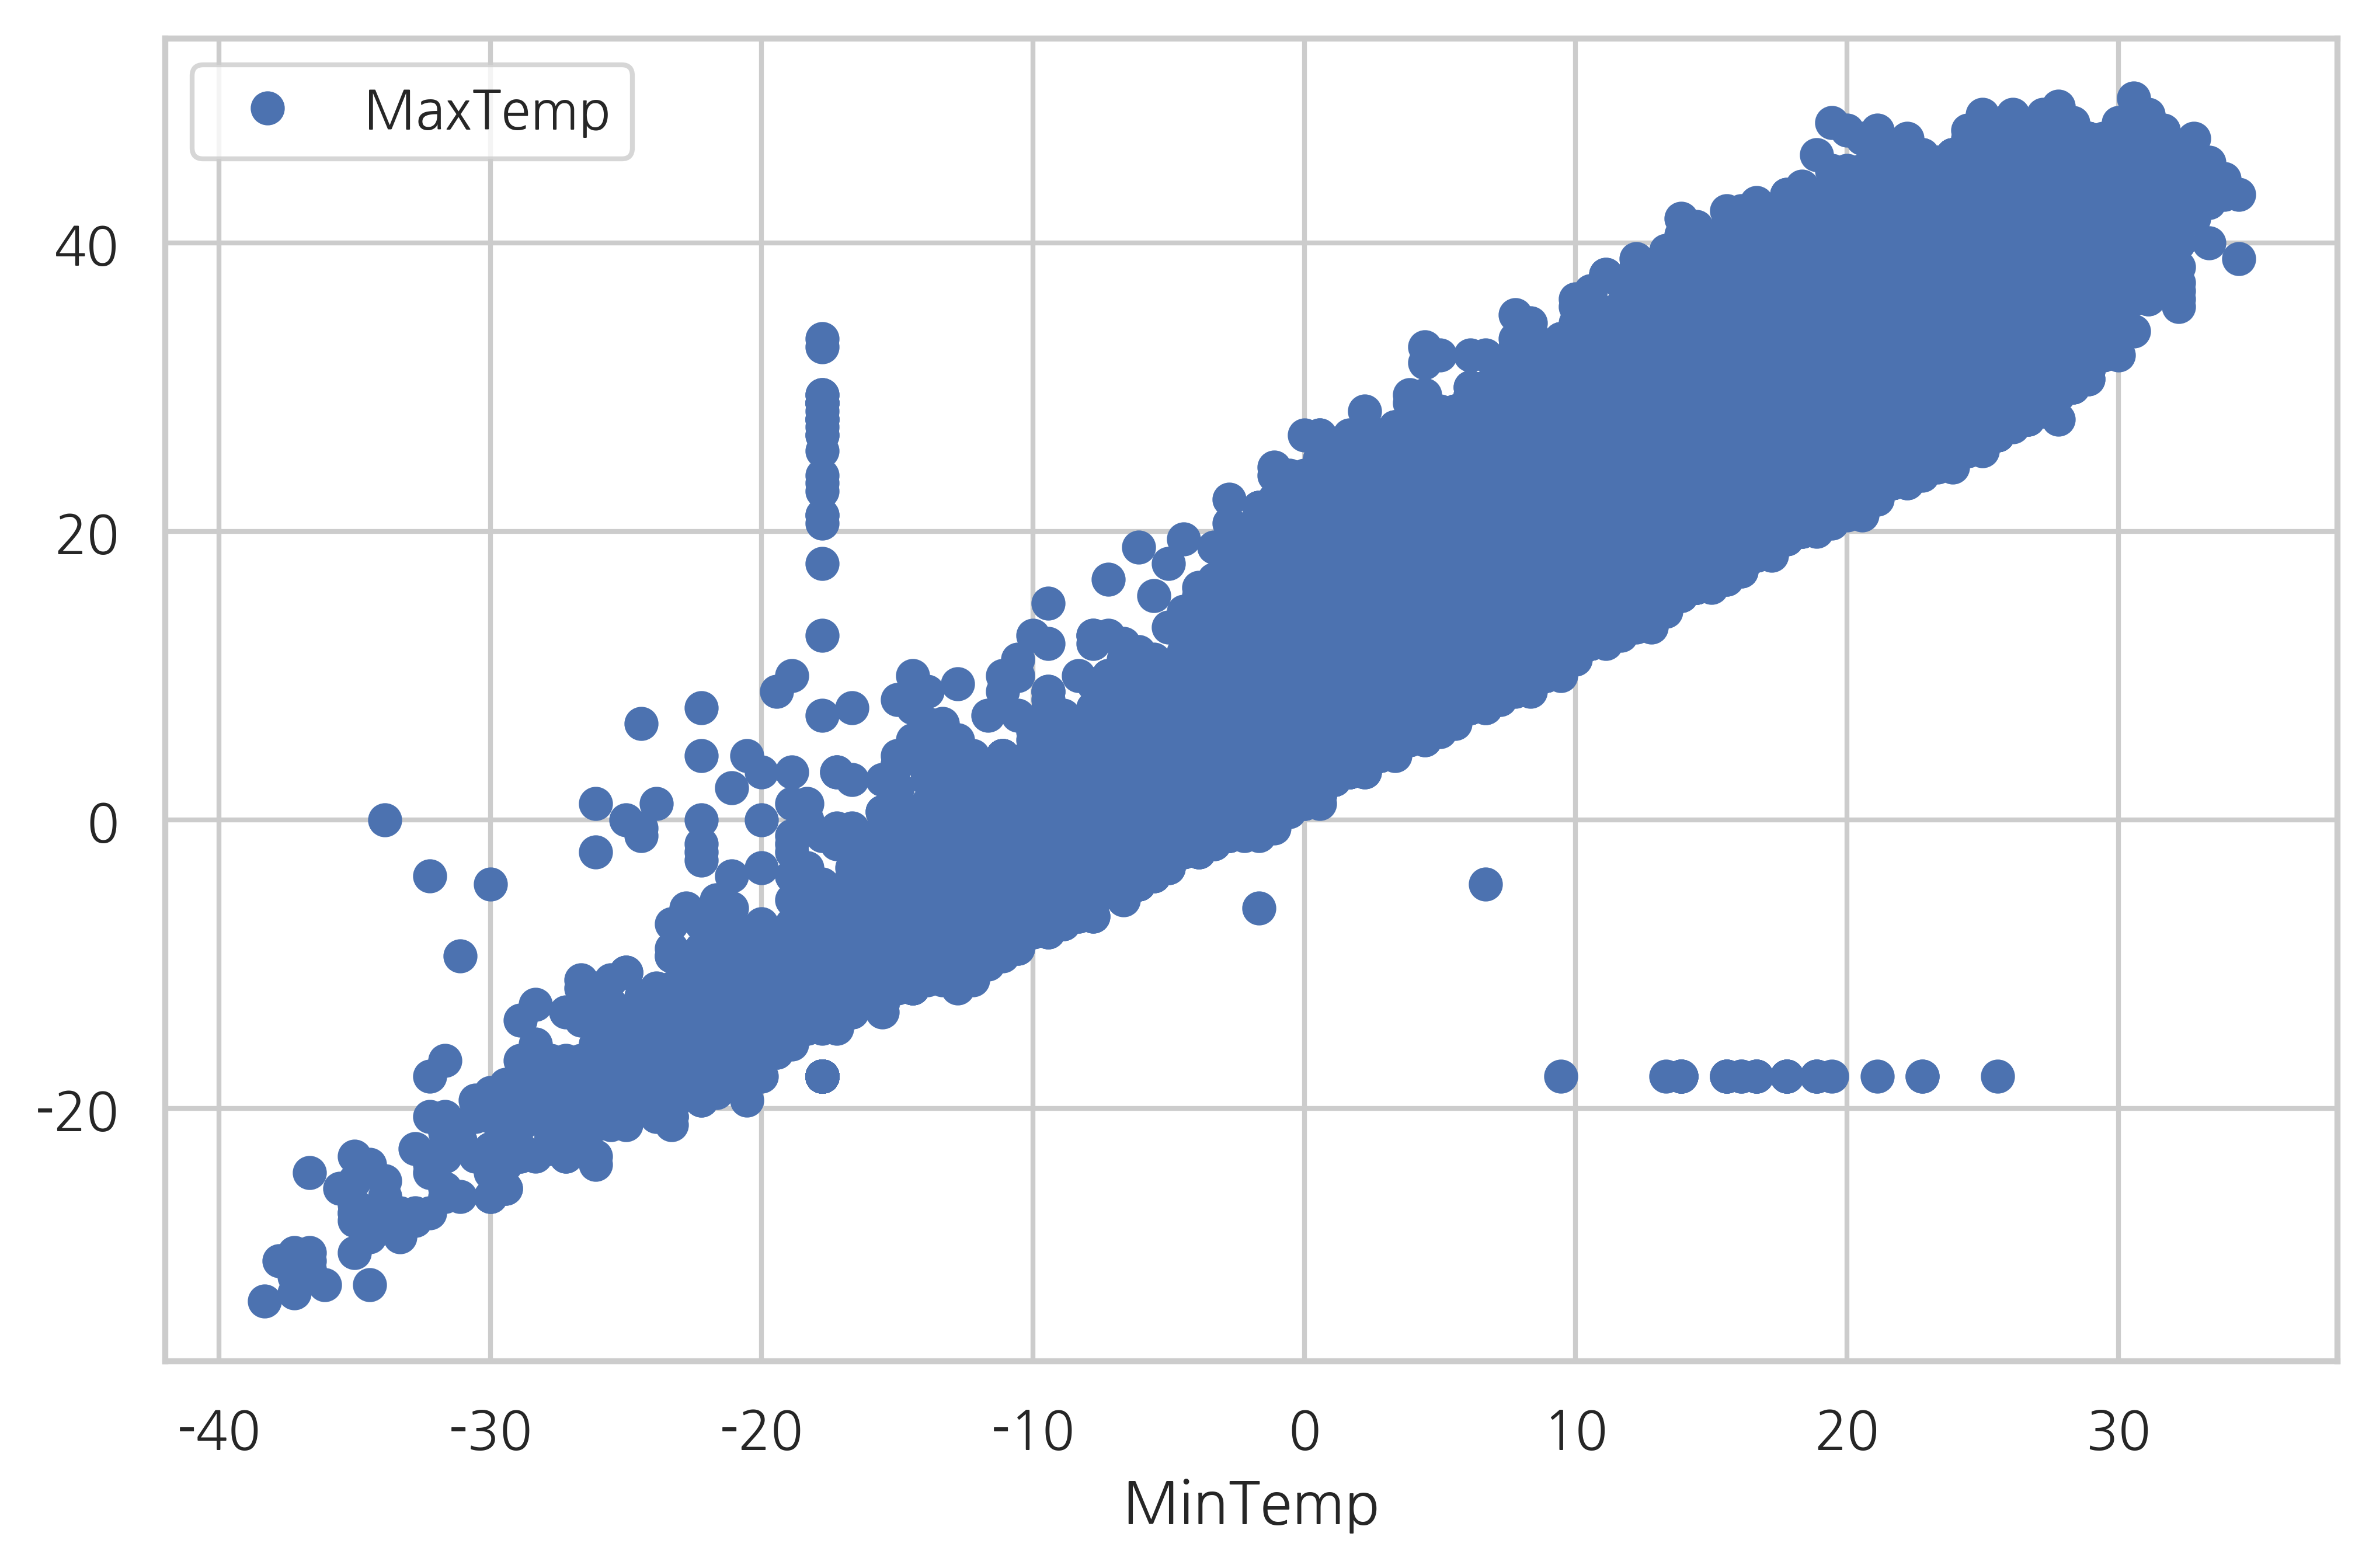

In [7]:
data.plot(x='MinTemp',y='MaxTemp',style='o')
plt.show()

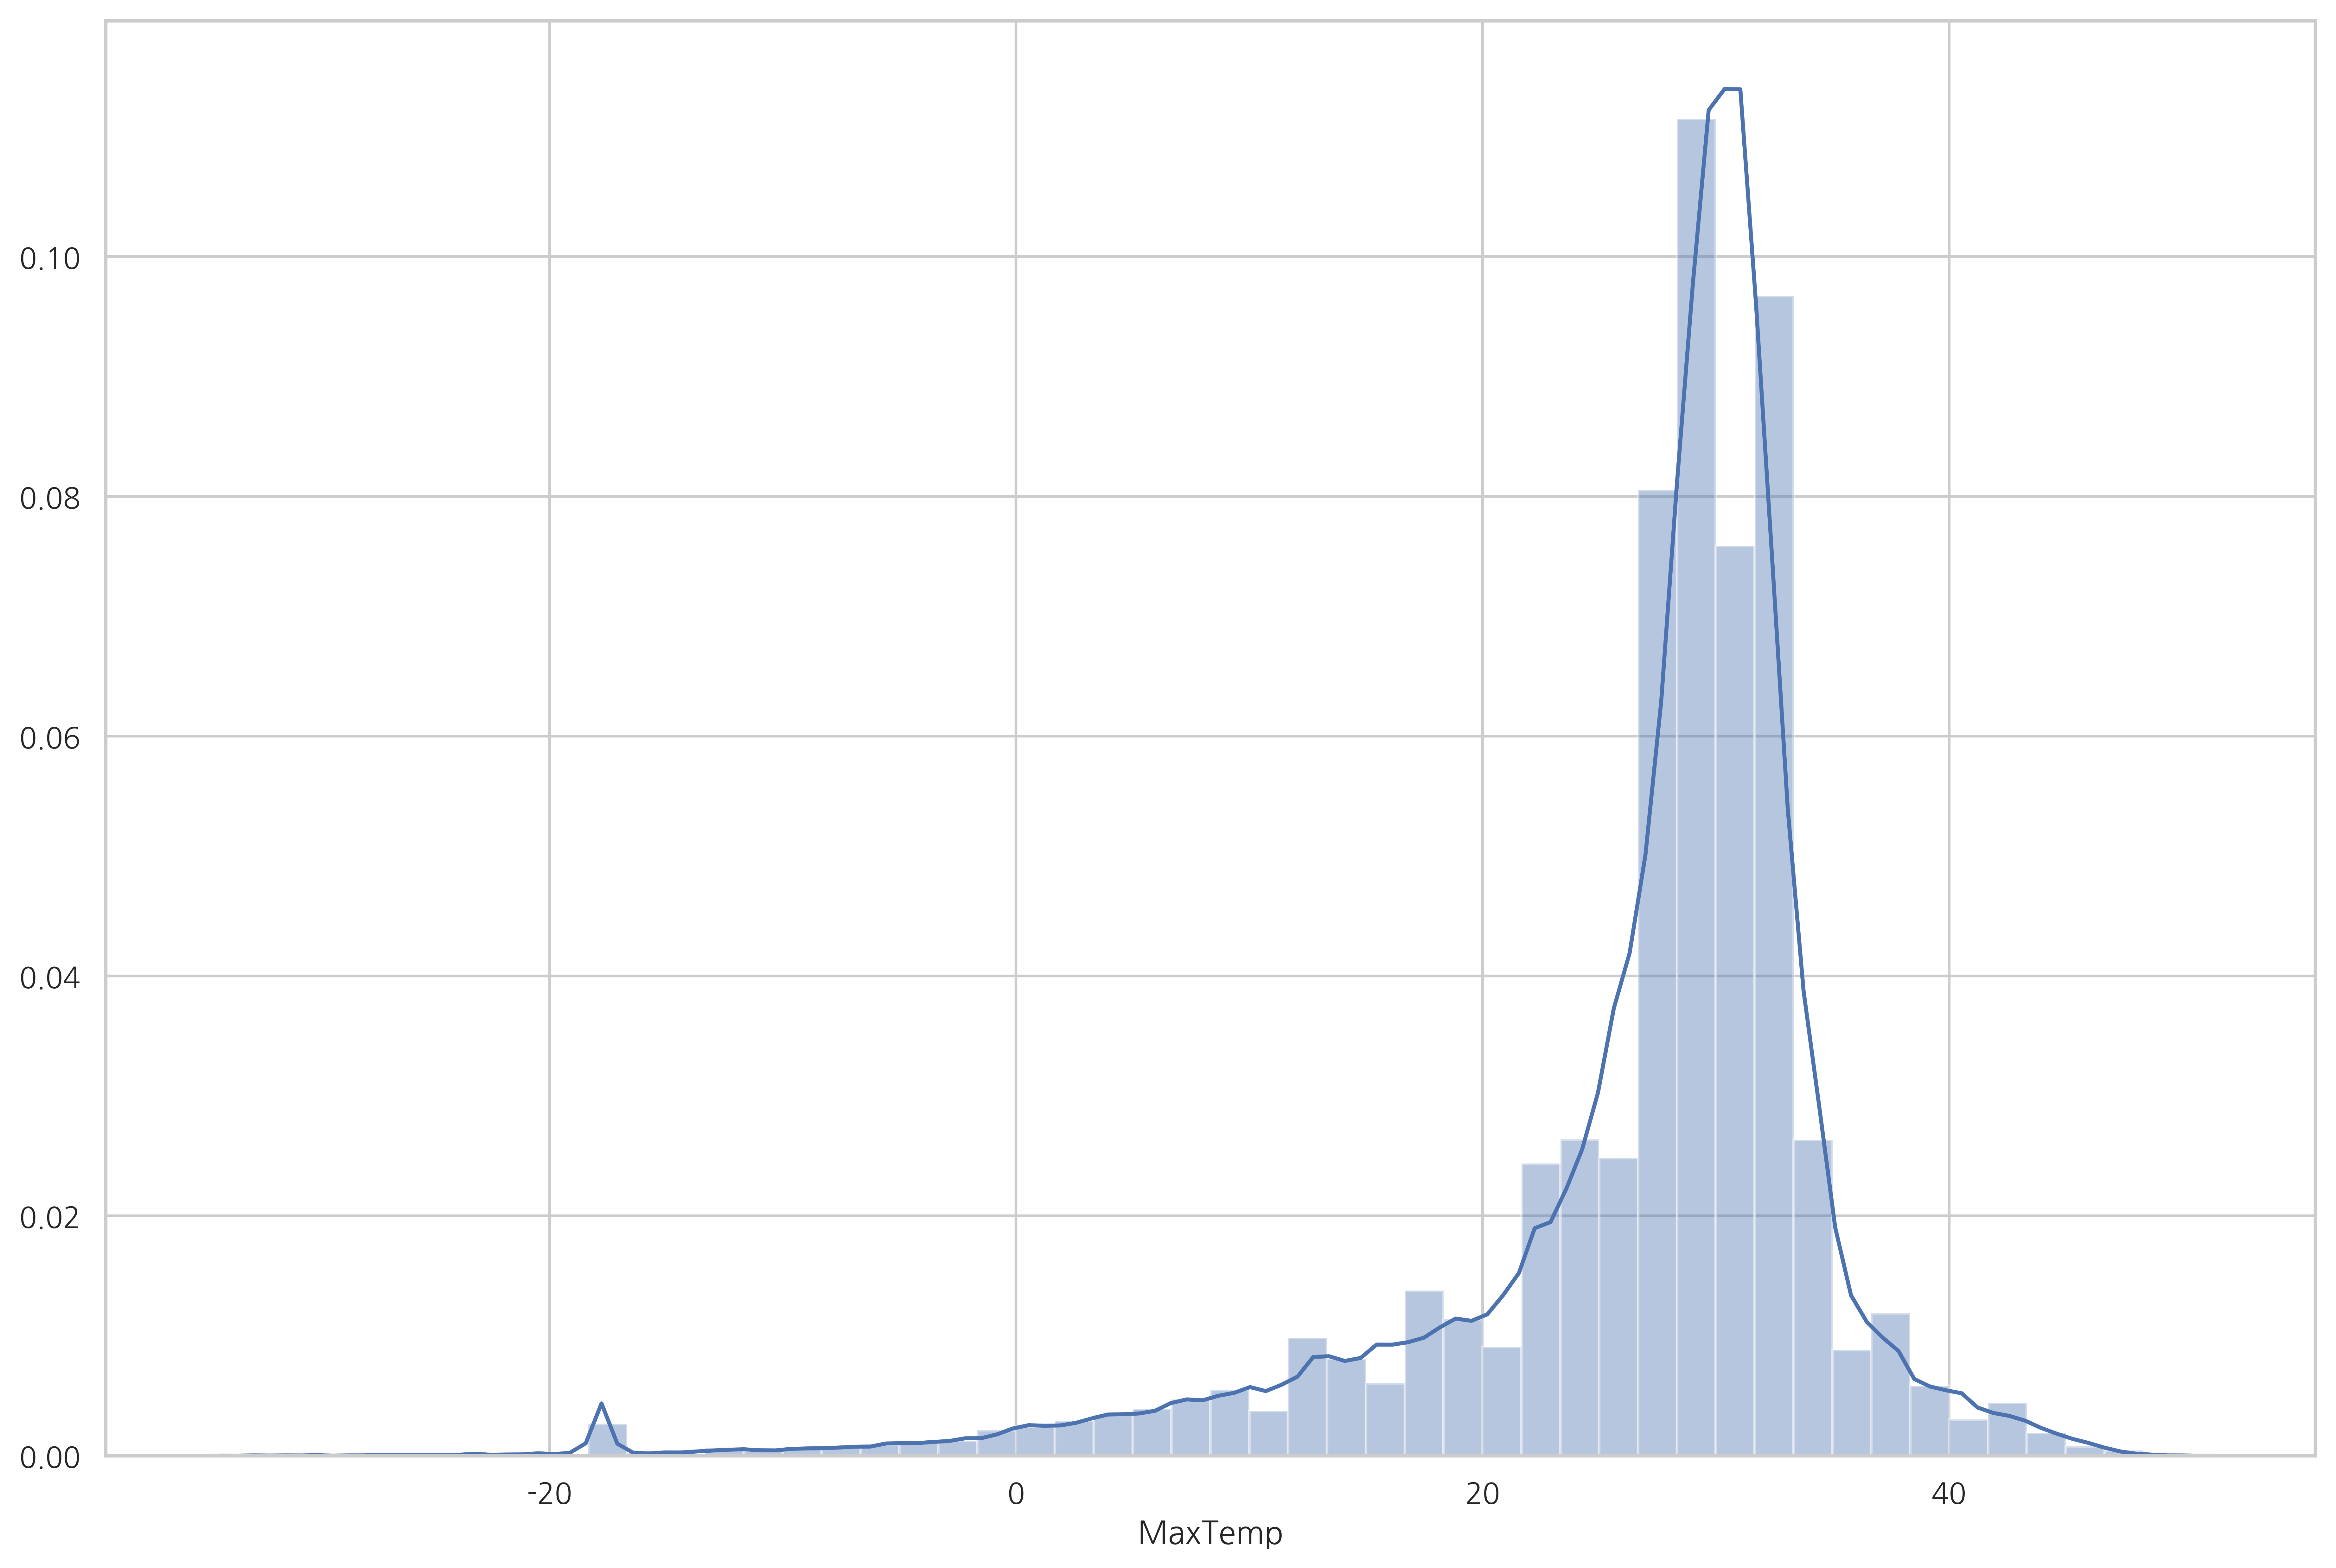

In [9]:
import seaborn as seabornInstance
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data["MaxTemp"])

In [10]:
x = data["MinTemp"].values.reshape(-1,1)
y = data["MaxTemp"].values.reshape(-1,1)

In [13]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
regressTest = LinearRegression()
regressTest.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
regressTest.intercept_, regressTest.coef_
#선형 모델의 변수와 상수
#y= ax + b 

(array([10.66185201]), array([[0.92033997]]))

In [23]:
rResult = regressTest.predict(xtest)

In [24]:
df_temp = pd.DataFrame({'ytest':ytest.flatten(),'prd':rResult.flatten()})
df_temp.head()

,ytest,prd
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


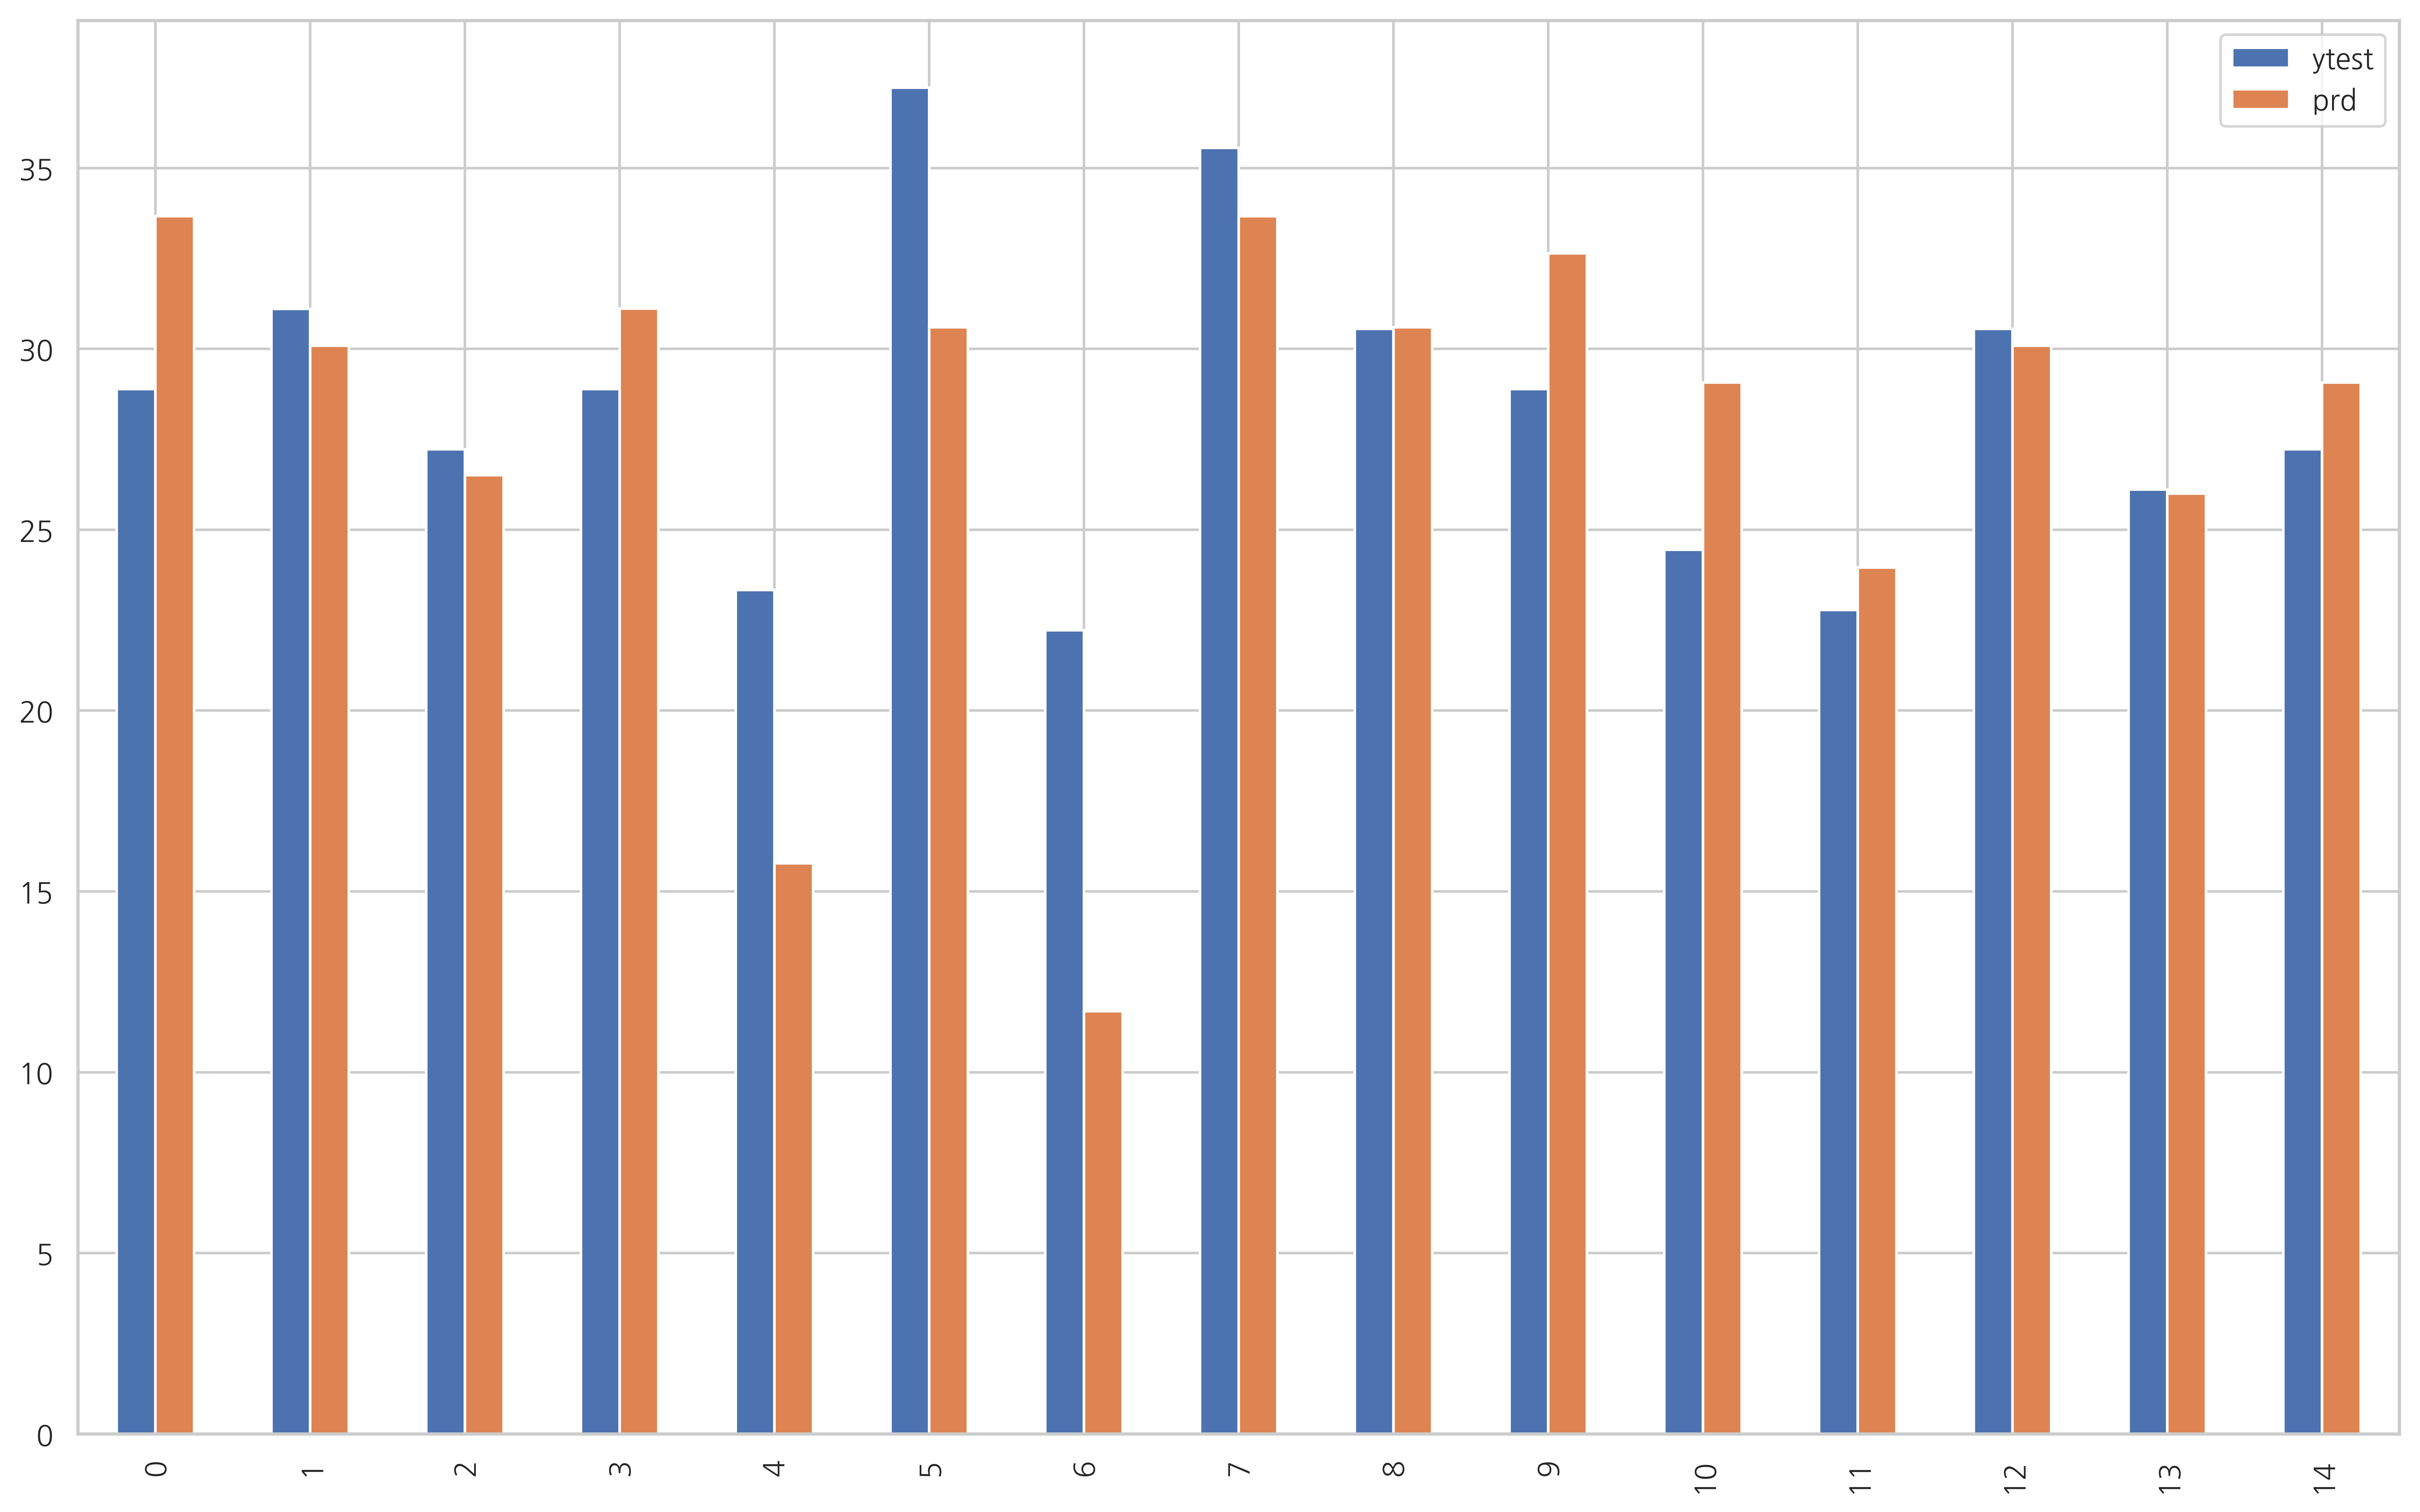

In [31]:
df2 = df_temp.head(15)
df2.plot(kind='bar',figsize=(16,10))
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest, rResult))
# Root Mean Squared Error(RMSE)

4.198996082109204